# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.pylab as pl
import scipy

In [2]:
%matplotlib inline

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

# 1.

   - A Bayesian analysis of probabilities is suitable for this data. WE first build a contingency table. The number of parameters is 1.

In [4]:
def contingency_table() :
    l = len(data)
    
    seri = (data.race == 'b') & (data.call == 1) 
    iB_iC = sum(seri)
    
    seri = (data.race == 'b') & (data.call == 0) 
    iB_nC = sum(seri)
       
    seri = (data.race == 'w') & (data.call == 1) 
    nB_iC = sum(seri)
    
    seri = (data.race == 'w') & (data.call == 0) 
    nB_nC = sum(seri)
    
    # display probability table
    
    d = {'is_black' : [iB_iC, iB_nC, sum(data.race == 'b')],'not_black': [nB_iC, nB_nC, sum(data.race == 'w')], 'total' : [sum(data.call == 1), sum(data.call == 0), len(data)]}
    df = pd.DataFrame(d)
    df['~'] = ['is_call', 'not_call', '+']
    df = df.set_index('~')
    print(df)

    return iB_iC,iB_nC, nB_iC, nB_nC

In [6]:
iB_iC, iB_nC, nB_iC, nB_nC = contingency_table()

          is_black  not_black  total
~                                   
is_call        157        235    392
not_call      2278       2200   4478
+             2435       2435   4870


In [7]:
x = [0, 1]
y = [iB_nC/sum(data.race == 'b'), iB_iC/sum(data.race == 'b')]

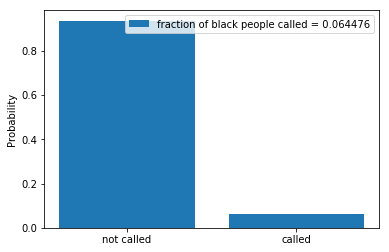

In [8]:
plt.bar(x, y)
plt.xticks(np.arange(2))
plt.ylabel('Probability')
plt.subplot().set_xticklabels(('not called', 'called'))
plt.legend(['fraction of black people called = %f' %(iB_iC/sum(data.race == 'b'))])

In [9]:
x = [0, 1]
y = [nB_nC/sum(data.race == 'w'), nB_iC/sum(data.race == 'w')]

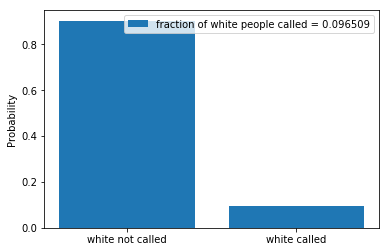

In [10]:
plt.bar(x, y)
plt.xticks(np.arange(2))
plt.ylabel('Probability')
plt.subplot().set_xticklabels(('white not called', 'white called'))
plt.legend(['fraction of white people called = %f' %(nB_iC/sum(data.race == 'w'))])

# 2.

The null hypothesis is that there is no racaial discrimination when it comes to calling resumes, be it in accepting or rejection proposals. This means that the mean of the null hypothesis distribution is 0 and the standard deviation is:
$$
\sigma_{H_0} = \sqrt{ \frac{\sigma_b^2}{n} + \frac{\sigma_w^2}{m} }
$$

The Alternate hypothesis is that there is discrimination on the baisi of race when it comes to accepting or rejecting resumes. 

### First, looking at the call fraction

In [11]:
#Difference of means becomes a z score for the null hypothesis
mu1 , mu2 = iB_iC/sum(data.race == 'b'), nB_iC/sum(data.race == 'w')
Z = mu1 - mu2
Z

-0.032032854209445585

In [12]:
#probability of success for the null hypothesis
p = (iB_iC + nB_iC)/((sum(data.race == 'b')*2))
p

0.080492813141683772

In [13]:
#Standard deviation of the null hypothesis
std = 2*p*(1-p) / sum(data.race == 'b')
std = std**0.5
std

0.0077968940361704568

In [14]:
def normal_variables(mu, std):
    xs = np.linspace(mu - 5*std, mu + 5*std, 10000)
    m = stats.norm(mu, std)
    ys = m.pdf(xs)
    return xs, ys

In [15]:
def find_threshold(x):
    i = 0
    while cs[i] < x:
        i += 1
    return i

In [16]:
xs, ys = normal_variables(0, std)
cs = np.cumsum( ys*(xs[1]-xs[0]))   # something like an integral over ys. cs is is an array of cumulative probabilities
    
thresh = find_threshold(0.05)

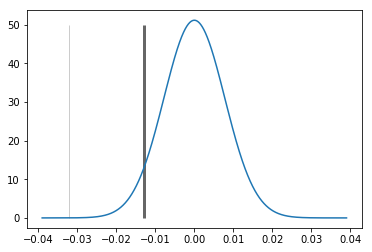

In [17]:
pl.plot(xs, ys)
plt.vlines([Z, xs[thresh]], 0, 50, linewidth=[1, 3], color=['0.8', '0.4'])

Thick black line shows the 5% probability mark, and the grey line is the Z-score of the difference of means on the null hypothesis.

In [18]:
j = find_threshold(Z)
pvalue = cs[j]

In [19]:
pvalue

1.486868201554586e-09

### Next looking at the rejection fraction :

In [20]:
mu1 , mu2 = iB_nC/sum(data.race == 'b'), nB_nC/sum(data.race == 'w')
Z = mu1 - mu2
Z

0.032032854209445683

In [21]:
p = (iB_nC + nB_nC)/((sum(data.race == 'b')*2))
p

0.91950718685831623

In [22]:
std = 2*p*(1-p) / sum(data.race == 'b')
std = std**0.5
std

0.0077968940361704568

In [23]:
xs, ys = normal_variables(0, std)
cs = np.cumsum( ys*(xs[1]-xs[0]))                                # something like an integral over ys
    
thresh = find_threshold(0.95)

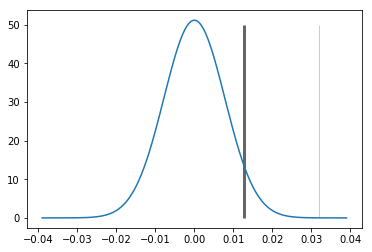

In [24]:
pl.plot(xs, ys)
plt.vlines([Z, xs[thresh]], 0, 50, linewidth=[1,3], color=['0.8', '0.4'])

Thick black line shows the 5% probability mark, and the grey line is the Z-score of the difference of means on the null hypothesis.

In [25]:
j = find_threshold(Z)
pvalue = cs[j]
pvalue

0.032071171498686497

In [26]:
margin_of_error = [xs[find_threshold(0.25)], xs[find_threshold(0.75)]]
margin_of_error

[-0.0052595309804950238, 0.0052595309804950238]

# 3.

   - The margin of error or the 50% confidence interval is (-0.0052595309804950238, 0.0052595309804950238)
   - The pvalue for the null hypothesis in cases of acceptance and rejection is 1.486868201554586e-09 and 0.032071171498686497 respectively.
   - The null hypothesis can be rejected as neither acceptance or rejection show significant markers of racial discrimination.



# 4.

   - The analysis of this sample of data shows that the margin of rejection is higher compares to margin of calls. This sample doesn't show significant racial discrimination when it comes to either rejection or acceptance of resumes.

In [27]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


# 5.
   - The dataframe has columns that are more valuable that name and race that are more likely to be weighed higher to find the best fit for a job, e.g. education, years of experience, etc. I would concentrate more on these aspects of the resumes to figure out the discriminatory factors when it comes to acceptance/rejection of proposals.